<a href="https://colab.research.google.com/github/avats-dev/ml-dl-challenges/blob/main/HE-DL/HE_DL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG19 with Batch Normalization

In [47]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

tf.random.set_seed(34)
np.random.seed(34)

In [48]:
#!unzip '/content/drive/MyDrive/datasets/data-he.zip'

In [49]:
%cd /content/drive/MyDrive/datasets/dataset
!ls

/content/drive/MyDrive/datasets/dataset
model.png  test  train	train.csv


In [50]:
df = pd.read_csv(r"/content/drive/MyDrive/datasets/dataset/train.csv")
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [51]:

#datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
#                           validation_split=0.2,
#                           rotation_range=45,
#                           zoom_range=.4)

datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
                           validation_split=0.2)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="/content/drive/MyDrive/datasets/dataset/train",
x_col="Image",
y_col="Class",
subset="training",
batch_size=32,
class_mode="categorical",
seed=32,
shuffle=True,
target_size=(224,224))

val_generator=datagen.flow_from_dataframe(
dataframe=df,
directory="/content/drive/MyDrive/datasets/dataset/train",
x_col="Image",
y_col="Class",
subset="validation",
batch_size=32,
class_mode="categorical",
target_size=(224,224))


Found 5176 validated image filenames belonging to 6 classes.
Found 1293 validated image filenames belonging to 6 classes.


In [52]:
base = tf.keras.applications.VGG19(
    include_top=False,
    input_shape=(224,224,3),
    weights='imagenet'
)
for layer in base.layers:
    layer.trainable=False

base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [53]:
from tensorflow.keras import layers

x = layers.Flatten()(base.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(6, activation='softmax')(x)

vggmodel = tf.keras.models.Model(base.input, x)
vggmodel.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

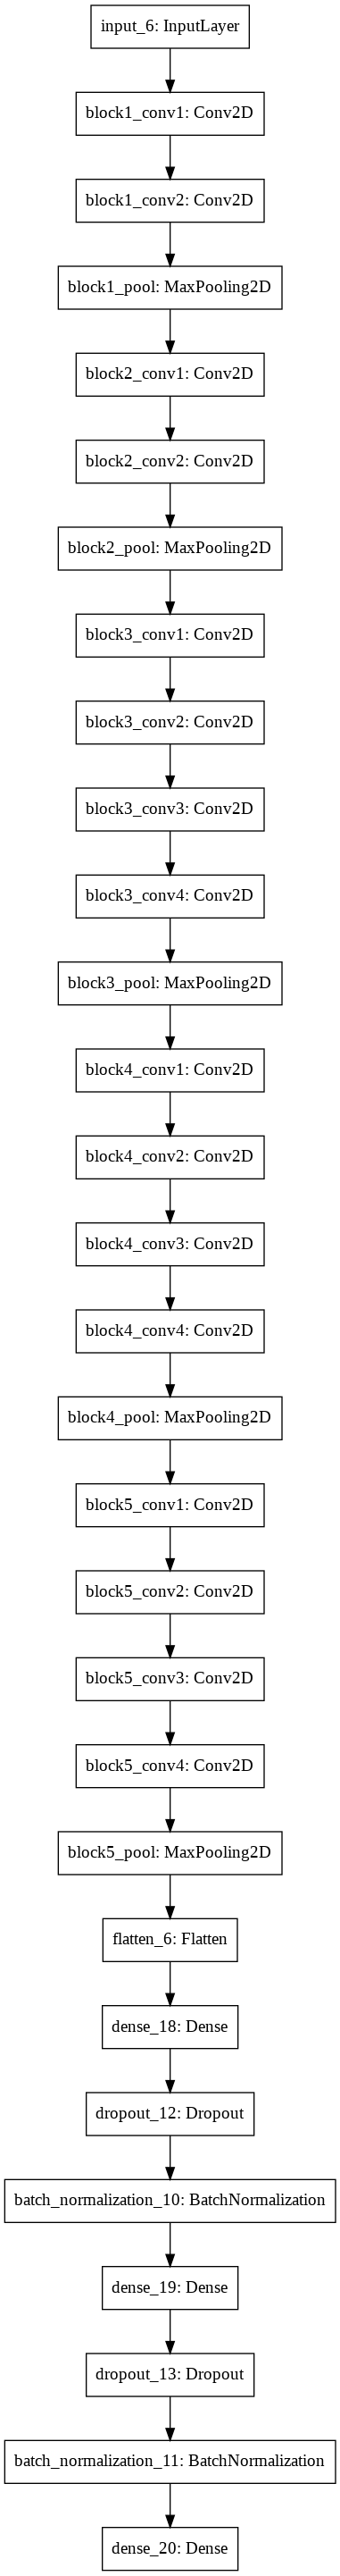

In [54]:
tf.keras.utils.plot_model(vggmodel)

In [55]:
sgd = tf.keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
vggmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
vgghist = vggmodel.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=val_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 2328s 14s/step - loss: 1.1175 - accuracy: 0.6532 - val_loss: 0.6059 - val_accuracy: 0.8117
Epoch 2/10
161/161 [==============================] - 30s 187ms/step - loss: 0.2634 - accuracy: 0.9149 - val_loss: 0.6429 - val_accuracy: 0.8148
Epoch 3/10
161/161 [==============================] - 32s 200ms/step - loss: 0.1143 - accuracy: 0.9621 - val_loss: 0.6760 - val_accuracy: 0.8164
Epoch 4/10
161/161 [==============================] - 32s 197ms/step - loss: 0.0735 - accuracy: 0.9786 - val_loss: 0.7029 - val_accuracy: 0.8219
Epoch 5/10
161/161 [==============================] - 31s 195ms/step - loss: 0.0655 - accuracy: 0.9812 - val_loss: 0.7684 - val_accuracy: 0.8234
Epoch 6/10
161/161 [==============================] - 32s 198ms/step - loss: 0.0436 - accuracy: 0.9874 - val_loss: 0.8216 - val_accuracy: 0.8125
Epoch 7/10
161/161 [==============================] - 32s 196ms/step - loss: 0.0437 - accuracy: 0.9849 - val_loss: 0.8261 - val_ac

In [ ]:
import os
from keras.preprocessing import image

TEST_DIR = '/content/drive/MyDrive/datasets/dataset/test/'
test_images = os.listdir(TEST_DIR)
predictions = []

for image in test_images:
    img = tf.keras.preprocessing.image.load_img(TEST_DIR + image, target_size=(224,224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    pred = vggmodel.predict(img).argmax(axis = 1)
    print (pred)
    predictions.append(pred)



In [73]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

prediction = []
for i in range(len(predictions)):
  prediction.append(labels[predictions[i][0]])



In [74]:
sub = pd.DataFrame({'Image': test_images, 'Class': prediction})
display(sub)
sub.to_csv('submission.csv', index = False)

,Image,Class
0,image3630.jpg,Miscellaneous
1,image9595.jpg,Miscellaneous
2,image2320.jpg,Candle
3,image1534.jpg,Miscellaneous
4,image2246.jpg,Miscellaneous
...,...,...
3484,image601.jpg,Jacket
3485,image3363.jpg,Miscellaneous
3486,image8958.jpg,Miscellaneous
3487,image4240.jpg,Jacket
